---

## ANALISIS SOBRE VENTAS DE SUPERMERCADOS

---

In [3]:
import numpy as np   # Importamos librerias de calculo
import pandas as pd  # Importamos librerias de uso de tablas o dataframes
import sklearn

df = pd.read_csv("ventas_supermercados.csv",thousands='.')  # Leer el archivo
df
headers = ["Fecha", "Ventas Pr Corrientes","Ventas Pr Constantes", "Ventas Totales", "Ventas Salon", "Ventas Online", "Ventas Totales Medio de pago", "Efectivo", "Debito", "Credito", "Otros", "Totales por Articulo", "Alimentos", "Bebidas", "Almacen", "Panaderia", "Lacteos", "Carnes", "Verduleria", "Rotiseria", "Limpieza/Perfumeria", "Indumentaria/Calzados", "Electronica","Otros"]
df.columns = headers # Cambiar los headers por los nombres de columna para ser mas descriptivos
df.sample(5)

,Fecha,Ventas Pr Corrientes,Ventas Pr Constantes,Ventas Totales,Ventas Salon,Ventas Online,Ventas Totales Medio de pago,Efectivo,Debito,Credito,...,Almacen,Panaderia,Lacteos,Carnes,Verduleria,Rotiseria,Limpieza/Perfumeria,Indumentaria/Calzados,Electronica,Otros
13,2018-02-01,31736824552140013,25650688732106395,3173682455214,313574448335,37937971864,3173682455214,10720300947148008,86078592800684,11364650340209996,...,769939538065,110168647128,339847722028,313691174234,124846928659,38739660138,472527713508,9050827940100002,17817398561899997,29958418654899998
31,2019-08-01,5967210445566601,2432991041230039,5967210445567001,5864792647731001,10241779783600001,5967210445567001,19745340249500003,16044555337071996,21781404017981987,...,1712541536678,220509844878,735148251123,64195548615259975,19037518360299997,6176985666999999,8632826213410001,12080976759300001,30735679513399997,5064885080120002
22,2018-11-01,4484944600603298,2489171263312131,4484944600603998,4407696079194998,77248521409,4484944600603998,15412653112490004,11132996566479996,16773555452833004,...,11863636204099998,162397248984,4918020845369999,4504157019553,159021427644,4723856955100001,6809307630779999,10237266606099999,24377363168,36068065624000006
56,2021-09-01,12300225242975804,2296200248544334,12300225242976002,11844751236423002,4554740065529999,12300225242976002,3808075085783998,3457538128240999,4344591137943999,...,34298836964778006,4333686607450002,14491051625599997,1472197988949,418426609273,110382394535,16336755107219998,280593430525,79771854935800005,8585647017749999
36,2020-01-01,7014501027272303,23483345683378706,7014501027273001,6910412761199,104088266074,7014501027273001,25121140424074013,16421681807168407,26279836484293897,...,1748911437861,2513045890880001,7612363147730001,7726181492612999,26851476436800007,74366602359,11066696534919998,17751801644500005,37682852241500006,6038180458899999


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Fecha                         61 non-null     object
 1   Ventas Pr Corrientes          61 non-null     int64 
 2   Ventas Pr Constantes          61 non-null     int64 
 3   Ventas Totales                61 non-null     int64 
 4   Ventas Salon                  61 non-null     int64 
 5   Ventas Online                 61 non-null     int64 
 6   Ventas Totales Medio de pago  61 non-null     int64 
 7   Efectivo                      61 non-null     int64 
 8   Debito                        61 non-null     int64 
 9   Credito                       61 non-null     int64 
 10  Otros                         61 non-null     int64 
 11  Totales por Articulo          61 non-null     int64 
 12  Alimentos                     61 non-null     int64 
 13  Bebidas               

In [5]:
# Estandarizamos porque los valores son muy extensos y poco manejables.
df ["Ventas Salon"] = df ["Ventas Salon"] / df ["Ventas Salon"].max()
df ["Ventas Online"] = df ["Ventas Online"] / df ["Ventas Online"].max()
df ["Efectivo"] = df ["Efectivo"] / df ["Efectivo"].max()
df ["Debito"] = df ["Debito"] / df ["Debito"].max()
df ["Credito"] = df ["Credito"] / df ["Credito"].max()
df ["Otros"] = df ["Otros"] / df ["Otros"].max()
df ["Alimentos"] = df ["Alimentos"] / df ["Alimentos"].max()
df ["Bebidas"] = df ["Bebidas"] / df ["Bebidas"].max()
df ["Almacen"] = df ["Almacen"] / df ["Almacen"].max()
df ["Panaderia"] = df ["Panaderia"] / df ["Panaderia"].max()
df ["Lacteos"] = df ["Lacteos"] / df ["Lacteos"].max()
df ["Carnes"] = df ["Carnes"] / df ["Carnes"].max()
df ["Verduleria"] = df ["Verduleria"] / df ["Verduleria"].max()
df ["Rotiseria"] = df ["Rotiseria"] / df ["Rotiseria"].max()
df ["Limpieza/Perfumeria"] = df ["Limpieza/Perfumeria"] / df ["Limpieza/Perfumeria"].max()
df ["Indumentaria/Calzados"] = df ["Indumentaria/Calzados"] / df ["Indumentaria/Calzados"].max()
df ["Electronica"] = df ["Electronica"] / df ["Electronica"].max()

In [6]:
df.drop(['Fecha','Ventas Pr Corrientes', 'Ventas Pr Constantes', 'Ventas Totales', 'Totales por Articulo', 'Ventas Totales Medio de pago' ], axis = 'columns', inplace=True) 
# Eliminamos columnas que no vamos a utilizar en el analisis

In [7]:
df.sample(5)

,Ventas Salon,Ventas Online,Efectivo,Debito,Credito,Otros,Alimentos,Bebidas,Almacen,Panaderia,Lacteos,Carnes,Verduleria,Rotiseria,Limpieza/Perfumeria,Indumentaria/Calzados,Electronica,Otros
48,0.000142,7.086912e-01,0.067861,0.575371,0.000637,1.681496e-04,0.109368,0.000016,0.293050,0.782111,0.000015,0.000184,1.000000,1.703265e-01,0.195747,0.544624,8.030170e-06,0.103358
41,0.112190,7.483612e-06,0.511567,0.044693,0.543087,1.383245e-05,0.874105,0.000009,0.271675,0.660992,0.000139,0.130482,0.640408,1.063548e-05,0.148875,0.000063,7.178226e-07,0.703534
42,0.114987,9.617941e-06,0.530818,0.481108,0.054747,1.445538e-06,0.000090,0.097147,0.281034,0.000007,0.000014,0.131836,0.665387,1.121346e-07,0.154219,0.617647,7.678480e-06,0.076826
25,0.066082,1.379436e-01,0.000033,0.267908,0.283835,4.712531e-07,0.499536,0.071225,0.000014,0.417108,0.000007,0.075726,0.394347,1.053070e-01,0.094902,0.000003,2.589375e-01,0.500235
11,0.000006,9.075479e-08,0.000029,0.240521,0.002699,4.536607e-01,0.004378,0.080156,0.000012,0.354106,0.554643,0.572462,0.343005,1.029149e-01,0.000007,0.000003,3.581868e-06,0.058277


### ANALISIS EXPLORATORIO DE LOS DATOS: MATRIZ DE CORRELACION

In [9]:
Cormat = df.corr()
Cormat

,Ventas Salon,Ventas Online,Efectivo,Debito,Credito,Otros,Alimentos,Bebidas,Almacen,Panaderia,Lacteos,Carnes,Verduleria,Rotiseria,Limpieza/Perfumeria,Indumentaria/Calzados,Electronica,Otros
Ventas Salon,1.000000,0.006008,-0.071666,-0.156615,-0.188860,0.281790,0.174983,0.067734,0.120419,0.131548,0.089551,-0.064669,-0.284985,0.201157,0.006830,-0.014244,-0.033674,-0.005901
Ventas Online,0.006008,1.000000,0.155613,0.384561,-0.162089,-0.074588,-0.046869,0.101548,0.042913,0.279529,0.113962,-0.006981,0.170871,0.187584,-0.027990,0.184694,0.227734,-0.033864
Efectivo,-0.071666,0.155613,1.000000,0.421505,0.208520,-0.039767,0.005177,-0.021073,-0.019556,0.019958,-0.133889,-0.096390,0.059116,-0.038089,0.089171,-0.065131,0.064813,0.205443
Debito,-0.156615,0.384561,0.421505,1.000000,0.201157,-0.014001,-0.043277,-0.005891,-0.022223,0.226167,-0.142983,0.077323,0.091828,-0.000949,0.159832,-0.019069,0.060354,-0.154527
Credito,-0.188860,-0.162089,0.208520,0.201157,1.000000,-0.179746,-0.038855,-0.136974,-0.081020,-0.094468,-0.247526,-0.129467,0.225971,0.003202,0.013398,0.237346,-0.035137,-0.052795
Otros,0.281790,-0.074588,-0.039767,-0.014001,-0.179746,1.000000,0.187393,0.108649,-0.165507,0.020108,0.013458,0.222070,-0.128793,-0.034020,0.109966,-0.051689,-0.042977,-0.042701
Alimentos,0.174983,-0.046869,0.005177,-0.043277,-0.038855,0.187393,1.000000,0.129498,0.198182,0.171321,-0.105760,0.037625,-0.227553,-0.136424,0.179594,-0.214048,0.058444,0.339391
Bebidas,0.067734,0.101548,-0.021073,-0.005891,-0.136974,0.108649,0.129498,1.000000,0.371708,0.113111,0.053568,0.084784,-0.087893,0.087650,-0.094109,0.010237,0.091448,0.047860
Almacen,0.120419,0.042913,-0.019556,-0.022223,-0.081020,-0.165507,0.198182,0.371708,1.000000,0.037757,0.048991,0.107647,0.127689,-0.050510,-0.073154,0.030868,0.095595,0.090709
Panaderia,0.131548,0.279529,0.019958,0.226167,-0.094468,0.020108,0.171321,0.113111,0.037757,1.000000,0.095872,-0.139226,0.088971,-0.109708,0.128068,-0.222912,0.065207,0.019274


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

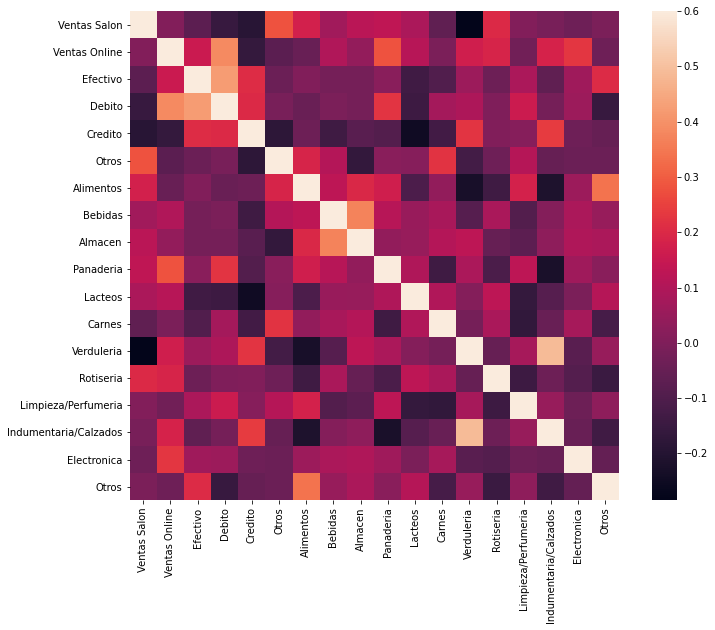

In [11]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(Cormat, vmax=.6, square=True)
# vmax: Hasta donde llega el gradiente, el difuminado de color, si fuera 1 seria hasta ser totalmente blanco.

# Interpretación: Mientras mas claro sean los colores, mayor correlación habra entre variables.

#### Simplificando:
#### Vamos a simplificar mostrando las 7 mejores correlaciones que puedo encontrar.

In [12]:
K = 7 # Definimos cuantas columnas me va a seleccionar como las mas correlacionadas.

In [13]:
cols = Cormat.nlargest(K, "Ventas Online")["Ventas Online"].index

In [14]:
cols # Me va a decir las 5 variables mas relacionadas con Ventas Online

Index(['Ventas Online', 'Debito', 'Panaderia', 'Electronica', 'Rotiseria',
       'Indumentaria/Calzados', 'Verduleria'],
      dtype='object')

In [15]:
# Definimos una nueva variable, haciendo la matriz mas chica para ver mejor las relaciones
cm = np.corrcoef(df[cols].values.T)

In [16]:
cm

array([[ 1.00000000e+00,  3.84560554e-01,  2.79529171e-01,
         2.27733924e-01,  1.87584267e-01,  1.84693971e-01,
         1.70870879e-01],
       [ 3.84560554e-01,  1.00000000e+00,  2.26167470e-01,
         6.03536374e-02, -9.48627834e-04, -1.90689693e-02,
         9.18275668e-02],
       [ 2.79529171e-01,  2.26167470e-01,  1.00000000e+00,
         6.52066061e-02, -1.09708347e-01, -2.22912459e-01,
         8.89713982e-02],
       [ 2.27733924e-01,  6.03536374e-02,  6.52066061e-02,
         1.00000000e+00, -8.81264402e-02, -4.72825591e-02,
        -7.98096179e-02],
       [ 1.87584267e-01, -9.48627834e-04, -1.09708347e-01,
        -8.81264402e-02,  1.00000000e+00, -3.87103037e-02,
        -5.26044598e-02],
       [ 1.84693971e-01, -1.90689693e-02, -2.22912459e-01,
        -4.72825591e-02, -3.87103037e-02,  1.00000000e+00,
         4.87843857e-01],
       [ 1.70870879e-01,  9.18275668e-02,  8.89713982e-02,
        -7.98096179e-02, -5.26044598e-02,  4.87843857e-01,
         1.0000000

In [14]:
sns.set(font_scale=1.25) # Tamaño de la fuente del grafico

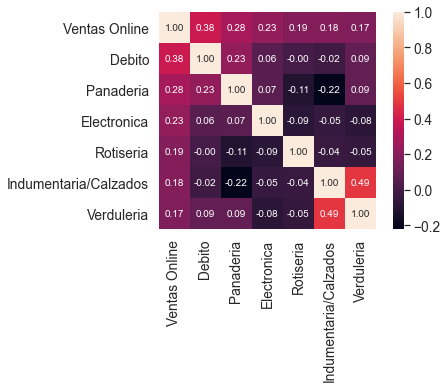

In [15]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size":10,}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Ahora probando con "Alimentos" para ver las mejores correlaciones.

In [17]:
cols = Cormat.nlargest(K, "Alimentos")["Alimentos"].index

In [18]:
cols # Me va a decir las 5 variables mas relacionadas con Ventas Online

Index(['Alimentos', 'Otros', 'Almacen', 'Otros', 'Limpieza/Perfumeria',
       'Ventas Salon', 'Panaderia'],
      dtype='object')

In [19]:
# Definimos una nueva variable, haciendo la matriz mas chica para ver mejor las relaciones
cm = np.corrcoef(df[cols].values.T)

In [20]:
cm

array([[ 1.        ,  0.18739296,  0.3393906 ,  0.19818218,  0.18739296,
         0.3393906 ,  0.17959374,  0.17498267,  0.17132116],
       [ 0.18739296,  1.        , -0.0427008 , -0.16550654,  1.        ,
        -0.0427008 ,  0.10996597,  0.28178982,  0.02010787],
       [ 0.3393906 , -0.0427008 ,  1.        ,  0.09070894, -0.0427008 ,
         1.        ,  0.03208437, -0.00590065,  0.0192739 ],
       [ 0.19818218, -0.16550654,  0.09070894,  1.        , -0.16550654,
         0.09070894, -0.0731543 ,  0.12041895,  0.03775736],
       [ 0.18739296,  1.        , -0.0427008 , -0.16550654,  1.        ,
        -0.0427008 ,  0.10996597,  0.28178982,  0.02010787],
       [ 0.3393906 , -0.0427008 ,  1.        ,  0.09070894, -0.0427008 ,
         1.        ,  0.03208437, -0.00590065,  0.0192739 ],
       [ 0.17959374,  0.10996597,  0.03208437, -0.0731543 ,  0.10996597,
         0.03208437,  1.        ,  0.00683003,  0.12806793],
       [ 0.17498267,  0.28178982, -0.00590065,  0.12041895,  0

In [20]:
sns.set(font_scale=1.25) # Tamaño de la fuente del grafico

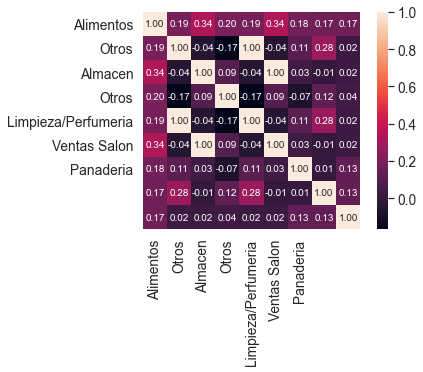

In [21]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size":10,}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Graficando los datos para ver cada correlación.

In [21]:
sns.set() # Le decimos a Seaborn que grafique con la configuracion de defecto.

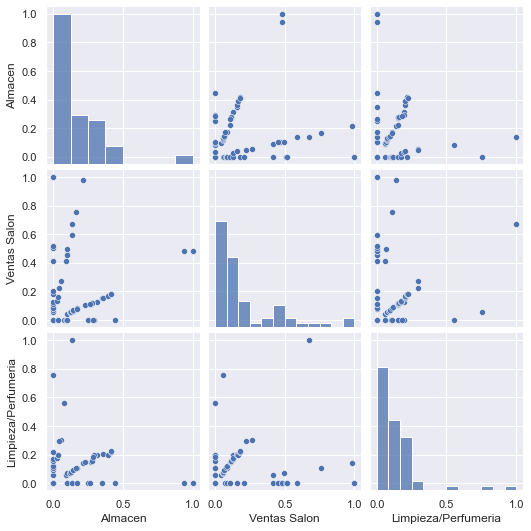

In [22]:
cols = ["Almacen", "Ventas Salon", "Limpieza/Perfumeria"]

sns.pairplot(df[cols], height=2.5)
plt.show()

#### Como resultado no hay fuentes de información que posean una correlación significante. Razon por la cual voy a proceder a aplicar arboles de decisión para tratar de predecir valores.

---
### ARBOLES DE DECISION...
---

#### Importamos a continuación las librerias y modulos que vamos a utilizar, luego durante el analisis importare otras mas.

In [23]:
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [24]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Alimentos"]
X = data.drop(["Alimentos"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.33,
                                     random_state=42)

In [25]:
# Primero creamos un arbol de decisión para ver la precisión y poder compararla
tree = DecisionTreeClassifier(max_depth=2, random_state=11) # Max depth acorta el arbol si no salia muy grande.
tree.fit(X_train, y_train)
print(f"La precisión del Arbol de decisión es de: {tree.score(X_test, y_test)}")

ValueError: Unknown label type: 'continuous'

In [26]:
# Como tenemos el error "Unknown label type: 'continuous'" que es muy comun en sklearn, procedemos a ver que variables da Y
sklearn.utils.multiclass.type_of_target(y_train)

'continuous'

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [28]:
sklearn.utils.multiclass.type_of_target(y_train)

'multiclass'

In [29]:
tree = DecisionTreeClassifier(max_depth=3, random_state=11) # Max depth acorta el arbol si no salia muy grande.
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=11)

In [30]:
from sklearn.tree import plot_tree # Importamos para graficar el arbol de decisión.
import matplotlib.pyplot as plt # Para manejar el tamaño del grafico del arbol.

### A) Visualizando el modelo

<Figure size 720x720 with 0 Axes>

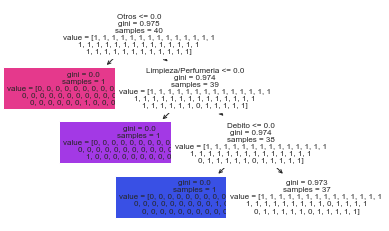

<Figure size 720x720 with 0 Axes>

In [31]:
plot_tree(decision_tree=tree, feature_names=X_train.columns, filled=True, fontsize=8); # Feature=nombre de columnas, Filled=Para colorear el arbol, el punto y coma al final es para que no salga todo el texto del arbol de decision y solo el grafico
plt.figure(figsize=(10,10))

In [32]:
# Valores tan grandes en el dataframe distorsionan el resultado para mostrarlo en un arbol de decisión.